# Sales analysis and visualization 

The goal of the analysis of the data is to cover the following questions:

#1. What is the overall sales trend? 

#2. Which are the Top 10 products by sales?

#3. Which are the Most Selling Products?

#4. Which is the most preferred Ship Mode?

#5. Which are the Most Profitable Category and Sub-Category?

In [161]:
import pandas as pd
import numpy as np

In [162]:
data = pd.read_excel('C:\\Users\\User\\Sales-Analysis-master\\superstore_sales.xlsx', engine='openpyxl')

In [163]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [164]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [165]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [166]:
data.describe(include ='all')

c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
count,51290,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290,51290.000000
unique,25035,1430,1464,4,795,3,1094,147,7,13,...,3,17,3788,NaN,NaN,NaN,NaN,NaN,4,NaN
top,CA-2014-100111,2014-06-18 00:00:00,2014-11-22 00:00:00,Standard Class,Muhammed Yedwab,Consumer,California,United States,APAC,Central,...,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium,NaN
freq,14,135,130,30775,108,26518,2001,9994,11002,11117,...,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433,NaN
first,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2014-12-31 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,246.490581,3.476545,0.142908,28.641740,26.375818,NaN,2012.777208
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,NaN,1.098931
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000,0.002000,NaN,2011.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,30.758625,2.000000,0.000000,0.000000,2.610000,NaN,2012.000000


# Modify the columns which would be of use for answering the questions

#1. What is the overall sales trend? - I need to keep the columns: category, sub_category, quantity, sales, product_name, order_date

#2. Which are the Top 10 products by sales? - I need to keep the columns: quantity, sales, product_name

#3. Which are the Most Selling Products?  - I need to keep the columns: quantity, sales, product_name

#4. Which is the most preferred Ship Mode?  - I need to keep the columns: shipping_cost, ship_mode

#5. Which are the Most Profitable Category and Sub-Category? - I need to keep the columns: sales, quantity, profit, 

sub_category, category


# To sum up these are the following columns that have to be kept:
category, subcategory, quantity, sales, product_name, shipping_cost, ship_mode, profit

Maybe include: country and market

In [21]:
data['order_date'].value_counts()

2014-06-18    135
2014-11-18    127
2014-09-03    126
2014-11-20    118
2014-12-29    116
             ... 
2011-01-16      1
2012-02-19      1
2012-07-15      1
2011-01-02      1
2011-02-06      1
Name: order_date, Length: 1430, dtype: int64

In [23]:
data['order_date'].isnull().sum()

0

In [22]:
data['sales'].value_counts()

12.9600     61
15.5520     41
19.4400     41
10.3680     37
25.9200     36
            ..
337.2456     1
716.8500     1
897.1500     1
114.9600     1
25.8720      1
Name: sales, Length: 27200, dtype: int64

In [25]:
data['sales'].isnull().sum()

0

In [34]:
data['order_date'].value_counts()

2014-06-18    135
2014-11-18    127
2014-09-03    126
2014-11-20    118
2014-12-29    116
             ... 
2011-01-16      1
2012-02-19      1
2012-07-15      1
2011-01-02      1
2011-02-06      1
Name: order_date, Length: 1430, dtype: int64

# Question 1 What is the overall sales trend?

In [41]:
import datetime

In [42]:
data['order_date'] = data['order_date'].dt.strftime('%Y-%m-%d')

In [94]:
data['year'] = data['year'].astype(int)

In [97]:
data['sales'] = data['sales'].astype(float)

In [135]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [112]:
sales_trend = data.groupby('year').sum()['sales'].reset_index()

In [113]:
sales_trend

,year,sales
0,2011,2.259451e+06
1,2012,2.677439e+06
2,2013,3.405746e+06
3,2014,4.299866e+06


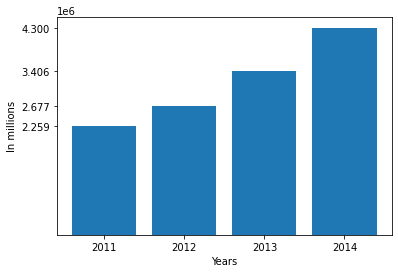

In [136]:
import matplotlib.pyplot as plt

plt.bar(sales_trend['year'], sales_trend['sales'])
plt.xticks(sales_trend['year'])
plt.yticks(sales_trend['sales'])
plt.xlabel('Years')
plt.ylabel('In millions')
plt.show()
#Answer to question number 1

# Question 2: Which are the Top 10 products by sales?

In [247]:
data = pd.read_excel('C:\\Users\\User\\Sales-Analysis-master\\superstore_sales.xlsx', engine='openpyxl')

In [178]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [255]:
yeah = data.groupby('product_name').sum()['sales'].reset_index()

In [256]:
yeah

,product_name,sales
0,"""While you Were Out"" Message Book, One Form pe...",25.228
1,"#10 Gummed Flap White Envelopes, 100/Box",41.300
2,#10 Self-Seal White Envelopes,108.682
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,477.660
3784,iOttie HLCRIO102 Car Mount,215.892
3785,iOttie XL Car Mount,223.888
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,442.554


In [264]:
yeah = yeah.sort_values('sales', ascending= False).tail(10)

In [267]:
yeah

,product_name,sales
2431,Newell 308,8.400
3334,Stockwell Gold Paper Clips,8.096
26,4009 Highlighters,8.040
3694,Xerox 1989,7.968
434,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.800
438,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
1641,Grip Seal Envelopes,7.072
3707,Xerox 20,6.480
373,Avery 5,5.760
1368,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624


# Question 3: Which are the Most Selling Products?

In [260]:
most_sold_product = data.groupby('product_name').sum()['quantity'].reset_index()

In [261]:
most_sold_product

,product_name,quantity
0,"""While you Were Out"" Message Book, One Form pe...",8
1,"#10 Gummed Flap White Envelopes, 100/Box",11
2,#10 Self-Seal White Envelopes,10
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...,...
3783,iKross Bluetooth Portable Keyboard + Cell Phon...,24
3784,iOttie HLCRIO102 Car Mount,12
3785,iOttie XL Car Mount,14
3786,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,29


In [262]:
most_sold_product = most_sold_product.sort_values('quantity', ascending = False)

In [270]:
most_sold_product[:10]

,product_name,quantity
3275,Staples,876
894,"Cardinal Index Tab, Clear",337
1210,"Eldon File Cart, Single Width",321
2840,"Rogers File Cart, Single Width",262
3070,"Sanford Pencil Sharpener, Water Color",259
3335,"Stockwell Paper Clips, Assorted Sizes",253
446,"Avery Index Tab, Clear",252
1981,"Ibico Index Tab, Clear",251
3179,"Smead File Cart, Single Width",250
3266,"Stanley Pencil Sharpener, Water Color",242


# Question 4: Which is the most preferred Ship Mode?

In [272]:
data.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [274]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


c:\users\user\appdata\local\programs\python\python36-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ship_mode', ylabel='count'>

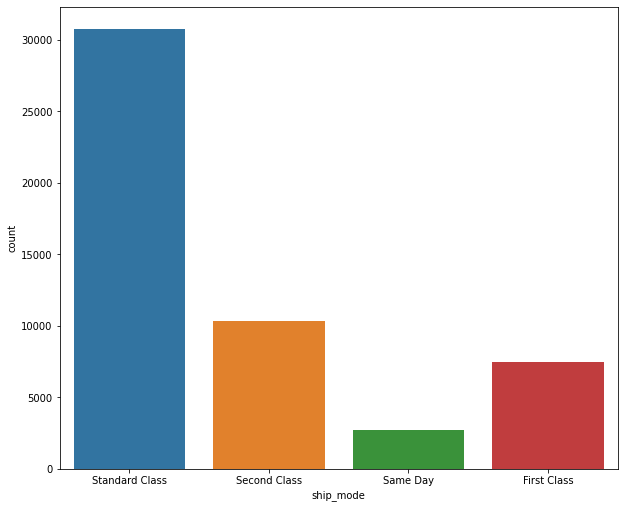

In [288]:
import seaborn as sns
plt.figure(figsize = (10,8.5))

sns.countplot(data['ship_mode'])

# Question 5: Which are the Most Profitable Category and Sub-Category?

In [290]:
data.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [293]:
data['category'].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: category, dtype: int64

In [317]:
categor = data.groupby(['category', 'sub_category']).sum()['profit'].reset_index()

In [324]:
category = categor.sort_values(['category', 'profit'], ascending=False)

In [325]:
category

,category,sub_category,profit
14,Technology,Copiers,258567.54818
16,Technology,Phones,216717.00580
13,Technology,Accessories,129626.30620
15,Technology,Machines,58867.87300
4,Office Supplies,Appliances,141680.58940
11,Office Supplies,Storage,108461.48980
6,Office Supplies,Binders,72449.84600
10,Office Supplies,Paper,59207.68270
5,Office Supplies,Art,57953.91090
7,Office Supplies,Envelopes,29601.11630
